# Lab 07: Nonlinear optimisation: Matrix factorization

This exercise will introduce an advanced version of non-linear optimization - the use of a gradient descent algorithm in a  movie recommender system. To achieve this aim we will introduce RMSE evaluation metric, 10-fold cross validation and the Matrix Factorization algorithm.

## Recommender Systems
Recommender systems were developed as a solution to the overwhelming number of content items available to the user. With the rapid growth of the internet availability the ease of multimedia item production the user can quickly become unable to chose what to watch / listen / read since he/she has too many items to chose from.
Recommender systems have developed as a solution to this problem. They work in many different ways - from looking for people with similar taste (Collaborative Recommender Systems) to discerning each user’s particular taste (Content-based Recommender Systems) to any combination of approaches (Hybrid Recommender System).
Regardless of the approach they require some setup - determining the optimum setting values to achieve the best performance. 
For this exercise we will focus on the Matrix Factorization approach which is one of the better known Collaborative algorithms.

The explanation of Matrix factorization is available in the literature:
https://e.fe.uni-lj.si/mod/folder/view.php?id=10996


## Matrix Factorization
The Matrix Factorization (MF) approach works by transforming the user-item matrix into a feature space that has some similarities with the PCA approach. The aim of the algorithm is to generate a set of latent features for each existing user and item. Any rating can then be calculated with the help of a dot product of the feature vector of the user who is looking for a recommendation and the feature vector of the potentially interesting multimedia item. 


## Base equation
The basic equation for predicted rating calculation is 
$r = b + b_u+b_i+p*q$
With $b$ being the global bias (database average rating), $b_u$ user bias, $b_i$ item bias and the $p*q$ the dot product of the feature vectors.

## Feature calculation
The challenge of the MF approach lies in the feature calculation. Since most of the user-item matrix features empty values (i.e. the users did not rate the items yet) we cannot use a direct PCA approach. Instead we use a gradient descent based approach that tries to set the feature values in such a way that the calculated rating match the actual ratings as close as possible.
 
The approach works (for each rating):
* Calculate the current predicted rating
* Error is the difference between the calculated rating and the true rating in the dataset
* Use the following two equations to set the value of the current latent feature
 - tmpUF =tempUF + (error *tempIF -regularization *tempUF) *pLearningRate
 - tmpIF = tempIF + (error *tempUF -regularization *tempIF) *qLearningRate 

The approach therefore features a set of parameters, that can be optimized to minimize the error of the prediction.



As usual we must import our data, prepare the dataset and initialize our values.

In [12]:
# Po potrebi je potrebno instalirati scikit-learn 
#  %pip install scikit-learn

import algorithm as alg
import logging
import DataParser as dp
import bralec as cnf

# CONFIGURATION PARAMETERS
#cnf.GE_cf.set("datasetFolding","fold","True") #to fold or not to fold
cnf.GE_cf.set("datasetFolding","fold","False") #to fold or not to fold

# SELECT DATA SET
# cnf.GE_cf.set("dataSet","dataName","CoMoDa_small.txt")
cnf.GE_cf.set("dataSet","dataName","CoMoDa_500.txt")

# Configure number of folds
cnf.GE_cf.set("datasetFolding", "numOfFolds", "5")

# Create training and testing data set 
dp.createTrainTestSet()
test = alg.Algorithm()

# Size of feature vector, representing users and items
test.numOfFeatures = 2
# Learning rate (speed)
test.pLearningRate = 0.2
test.qLearningRate = 0.2
# Regularization 
test.regularization = 0.5
# Starting value of features
test.initFeatureValue = 0.2
# Number of iterations
test.numofiterations = 20

0.03


In [13]:
# Preveri učno množico podatkov - training set
trset = dp.db.trainSet
print(dp.db.trainSet)
print(dp.db.trainSet.shape)

# Preveri velikost testne množice


# Koliko je vhodnih podatkov ?
# Kako so razdeljeni v učno in testno množico ? 


[[9.600e+01 3.526e+03 5.000e+00]
 [5.000e+01 3.568e+03 3.000e+00]
 [2.800e+01 2.240e+02 3.000e+00]
 ...
 [4.100e+01 4.900e+01 4.000e+00]
 [4.200e+01 5.700e+01 5.000e+00]
 [6.100e+01 6.500e+01 4.000e+00]]
(400, 3)


## Evaluation
In order to evaluate the efficiency of the settings we will use the RMSE and 10-fold cross validation.

### RMSE
RMSE is one of the “standard” approaches in RS. It calculates the Root Mean Square Error - the difference between the predicted and the true rating.
$RMSE = \sqrt{\frac{\sum_1^{N}(\hat{r}-r)^2}{N}}$

 
So the lower the value, the better our system fits the values.


In [14]:

%%time

# Poženemo učenje na učni množici, in dobimo rezultat evaluacije napake na testni množici.
print (test.getBaseline())

INFO - Calculating baseline
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - MF algorithm RMSE = 1.076474487631678


1.076474487631678
CPU times: user 4.97 s, sys: 1.93 ms, total: 4.98 s
Wall time: 5.02 s


In [15]:
# Rezultat - napaka na trenutni testni množici
test.evaluateModel()

1.076474487631678

### Križna validacija: 10-fold cross validation

There often exists a set of setting values that performs extraordinarily on one set of data well but fails on all other sets. We are of course interested in values that would perform well in any environment. In order to find this we use the 10-fold cross validation approach - we split the data set into 10 parts and use 9 parts for training and 1 part for evaluation and repeat this 10 times - each time using different part for evaluation. This ensures that our parameters work well with different combinations of data.

In [25]:
# CONFIGURATION PARAMETERS
cnf.GE_cf.set("datasetFolding","fold","True") #to fold or not to fold

# SELECT DATA SET
# cnf.GE_cf.set("dataSet","dataName","CoMoDa_small.txt")
cnf.GE_cf.set("dataSet","dataName","CoMoDa_500.txt")

# Configure number of folds
cnf.GE_cf.set("datasetFolding", "numOfFolds", "10")

# Create training and testing data set 
dp.createTrainTestSet()
test = alg.Algorithm()

# Size of feature vector, representing users and items
test.numOfFeatures = 3
# Learning rate (speed)
test.pLearningRate = 0.2
test.qLearningRate = 0.2
# Regularization 
test.regularization = 0.5
# Starting value of features
test.initFeatureValue = 0.2
# Number of iterations
test.numofiterations = 10

0.03


In [26]:
%%time
print ("estimated error",test.getBaseline())

INFO - Calculating baseline
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - MF algorithm RMSE = 1.004220347626274


estimated error 1.004220347626274
CPU times: user 7.43 s, sys: 12.3 ms, total: 7.44 s
Wall time: 7.53 s


### Task 1
Perform tests with different number of folds : no folding (0), 2 folds, 5, and 10, observing the error (RMSE) and computation time. 

How does the number of folds affect reliability of the estimated error (RMSE) ? 



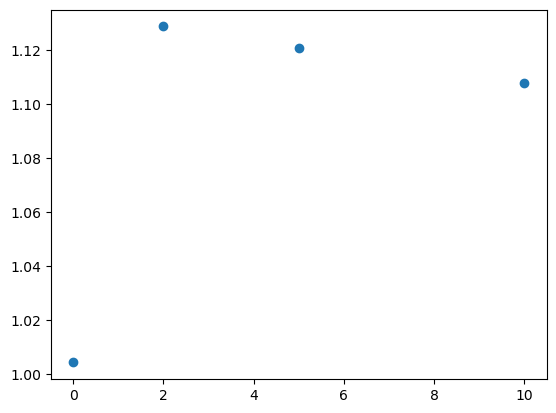

In [28]:
import matplotlib.pyplot as plt
baseline_for_folds = {
    0: 1.004220347626274,
    2: 1.1288733134791702,
    5: 1.1209891218186578,
    10: 1.108013352768553,
}
plt.scatter(baseline_for_folds.keys(), baseline_for_folds.values())
plt.show()

> Increasing the number of folds gets us a better precision of the error because each time we run the learning a subset of values is used a training set and the rest as test data. The splitting is done randomly: giving us a variation of the estimated error between runs.

### Task 2:

Perform tests with varying number of features : 1,2,4,6,8,10

Calculate error (RMSE), and present results in a table or a graph.

How does increasing number of features affect the error ? 


In [ ]:
res = {}
for num_features in [1,2,4,6,8,10]:
    # CONFIGURATION PARAMETERS
    cnf.GE_cf.set("datasetFolding","fold","True") #to fold or not to fold

    # SELECT DATA SET
    # cnf.GE_cf.set("dataSet","dataName","CoMoDa_small.txt")
    cnf.GE_cf.set("dataSet","dataName","CoMoDa_500.txt")

    # Configure number of folds
    cnf.GE_cf.set("datasetFolding", "numOfFolds", "5")

    # Create training and testing data set 
    dp.createTrainTestSet()
    test = alg.Algorithm()

    # Size of feature vector, representing users and items
    test.numOfFeatures = num_features
    # Learning rate (speed)
    test.pLearningRate = 0.2
    test.qLearningRate = 0.2
    # Regularization 
    test.regularization = 0.5
    # Starting value of features
    test.initFeatureValue = 0.2
    # Number of iterations
    test.numofiterations = 10
    res[num_features] = test.getBaseline()
print(res)

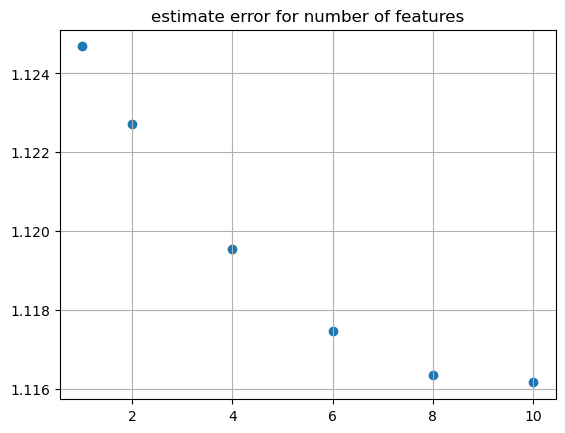

In [31]:
res = {1: 1.1246816233480064, 2: 1.122707148196437, 4: 1.1195583014467216, 6: 1.1174695465488331, 8: 1.116349093375493, 10: 1.1161613861228552}

plt.scatter(res.keys(), res.values())
plt.grid()
plt.title("estimate error for number of features")
plt.show()

With more feature we get a lower error, but it take more time to compute


### Task 3 
* Test the effect of regularization, by testing values 0.1, 0.2, 0.4, 0.6, 0.8 (number of features is 5). Plot the resulting RMSE.

* (Bonus) Test the effect of learning rate, by testing values 0.1, 0.2, 0.4, 0.6, 0.8 (number of features is 5). Plot the resulting RMSE.


In [33]:
import time

In [34]:
res = {}    
for reg in [0.1, 0.2, 0.4, 0.6, 0.8]:
    start = time.time()
    # CONFIGURATION PARAMETERS
    cnf.GE_cf.set("datasetFolding","fold","True") #to fold or not to fold

    # SELECT DATA SET
    # cnf.GE_cf.set("dataSet","dataName","CoMoDa_small.txt")
    cnf.GE_cf.set("dataSet","dataName","CoMoDa_500.txt")

    # Configure number of folds
    cnf.GE_cf.set("datasetFolding", "numOfFolds", "5")

    # Create training and testing data set 
    dp.createTrainTestSet()
    test = alg.Algorithm()

    # Size of feature vector, representing users and items
    test.numOfFeatures = 5
    # Learning rate (speed)
    test.pLearningRate = 0.2
    test.qLearningRate = 0.2
    # Regularization 
    test.regularization = reg
    # Starting value of features
    test.initFeatureValue = 0.2
    # Number of iterations
    test.numofiterations = 10
    res[reg] = (test.getBaseline(), time.time()-start)
print(res)

INFO - Calculating folded baseline: 5
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0


0.03


INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 103
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3585
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO - MF algorithm RMSE = 1.1203084405787287
INFO - Calculating folded baseline: 5
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0


0.03


INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 103
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3585
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO - MF algorithm RMSE = 1.120544577687178
INFO - Calculating folded baseline: 5
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0


0.03


INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 103
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3585
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO - MF algorithm RMSE = 1.116786161845573
INFO - Calculating folded baseline: 5
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0


0.03


INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 103
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3585
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO - MF algorithm RMSE = 1.118312014270081
INFO - Calculating folded baseline: 5
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0


0.03


INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 103
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3585
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO -  MaxUserId = 157
INFO -  MaxItemId = 3646
INFO - Feature = 0
INFO - Feature = 1
INFO - Feature = 2
INFO - Feature = 3
INFO - Feature = 4
INFO - MF algorithm RMSE = 1.1204840050543718


{0.1: (1.1203084405787287, 61.766960859298706), 0.2: (1.120544577687178, 61.547566175460815), 0.4: (1.116786161845573, 60.90737843513489), 0.6: (1.118312014270081, 62.87743663787842), 0.8: (1.1204840050543718, 62.823233127593994)}


In [ ]:
plt.scatter(res.keys(), res.values()[0], label = "RMSE")
plt.scatter(res.keys(), res.values()[1], label = "time to compute")
plt.grid()
plt.legend()
plt.title("estimate error and time to compute for regularization values")
plt.show()

In [ ]:
res = {}    
for learning_rate in [0.1, 0.2, 0.4, 0.6, 0.8]:
    start = time.time()
    # CONFIGURATION PARAMETERS
    cnf.GE_cf.set("datasetFolding","fold","True") #to fold or not to fold

    # SELECT DATA SET
    # cnf.GE_cf.set("dataSet","dataName","CoMoDa_small.txt")
    cnf.GE_cf.set("dataSet","dataName","CoMoDa_500.txt")

    # Configure number of folds
    cnf.GE_cf.set("datasetFolding", "numOfFolds", "5")

    # Create training and testing data set 
    dp.createTrainTestSet()
    test = alg.Algorithm()

    # Size of feature vector, representing users and items
    test.numOfFeatures = 5
    # Learning rate (speed)
    test.pLearningRate = learning_rate
    test.qLearningRate = learning_rate
    # Regularization 
    test.regularization = 0.5
    # Starting value of features
    test.initFeatureValue = 0.2
    # Number of iterations
    test.numofiterations = 10
    res[reg] = (test.getBaseline(), time.time()-start)
print(res)

In [ ]:
plt.scatter(res.keys(), res.values()[0], label = "RMSE")
plt.scatter(res.keys(), res.values()[1], label = "time to compute")
plt.grid()
plt.legend()
plt.title("estimate error and time to compute for learning rate")
plt.show()